<a href="https://colab.research.google.com/github/victorviro/Design-of-experiments/blob/master/Central_limit_theorem_and_law_of_large_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


1. [Law of large numbers](#1)
    1. [Example](#1.1)
2. [Central limit theorem](#2)
    1. [Example](#2.1)
3. [References](#3)




# Law of large numbers <a name="1"></a>

The [***law of large numbers (LLN)***](https://en.wikipedia.org/wiki/Law_of_large_numbers) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the **average of the results obtained from a large number of trials should be close to the expected value** and will tend to become closer to the expected value as more trials are performed.

Formaly, if $\boldsymbol{X}_1,\boldsymbol{X}_2,...,\boldsymbol{X}_n$ are $n$  independent and identically distributed random variables (with the same mean $\mu$ and standard deviation $\sigma$). Both versions of the law (strong law and weak law) state that the sample average $\boldsymbol{\overline{X}}_n=\frac{1}{n}\sum_{i=1}^n \boldsymbol{X}_i$ converges to the expected value. That is, $\boldsymbol{\overline{X}}_n \to \mu$ as $n \to \infty$.

## Example <a name="1.1"></a>

For example, a [fair coin](https://en.wikipedia.org/wiki/Fair_coin) toss is a Bernoulli trial. When a fair coin is flipped once, the theoretical probability that the outcome will be heads is equal to $\frac{1}{2}$. Therefore, according to the law of large numbers, the proportion of heads in a "large" number of coin flips "should be" roughly $\frac{1}{2}$. In particular, the proportion of heads after $n$ flips will almost surely converge to $\frac{1}{2}$ as $n$ approaches infinity.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

In [2]:
n = 1000
means = []
for sample_size in range(1,n+1):
    sample = np.random.binomial(size=sample_size, n=1, p=0.5)
    means.append(np.mean(sample))

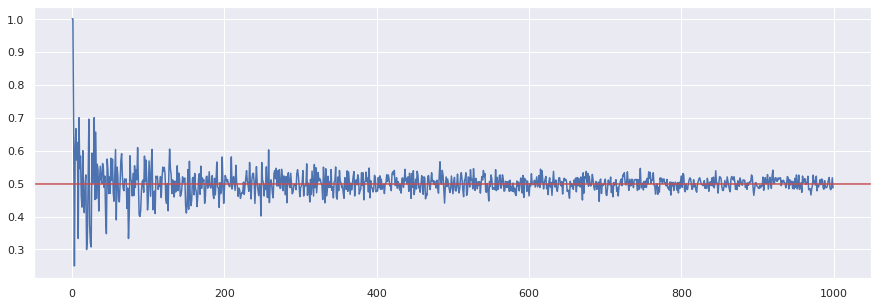

In [3]:
plt.figure(figsize=(15,5))
sns.lineplot(x=np.arange(n), y=means)
plt.axhline(y=0.5, c='r')
plt.show()

# Central limit theorem <a name="2"></a>

The [***central limit theorem (CLT)***](https://en.wikipedia.org/wiki/Central_limit_theorem) states that if we have a population with mean $\mu$ and standard deviation $\sigma$ and **take sufficiently large random samples from the population** with replacement, then the **distribution of the sample means will be approximately normally distributed**. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually $n>30$). 

More formaly, if $\boldsymbol{X}_1,\boldsymbol{X}_2,...,\boldsymbol{X}_n$ are $n$ independent and identically distributed random variables with $E(\boldsymbol{X}_i)=\mu$ and $\text{Var}(\boldsymbol{X}_i)=\sigma^2 < \infty$. Then, for $n$ large, $\boldsymbol{\overline{X}}_n \sim N(\mu, \frac{\sigma^2}{n})$.

![](https://i.ibb.co/RCy9bNm/CLT.png)

## Example <a name="2.1"></a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import clear_output

sns.set_theme()

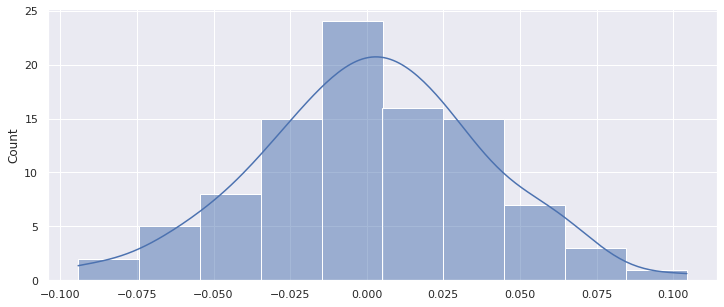

In [5]:
samples_number = 100
sample_size = 1000
means = []
for sample_number in range(samples_number):
    sample = np.random.randn(sample_size)
    means.append(np.mean(sample))
    if sample_number%5==0:
        clear_output(wait=True)
        plt.figure(figsize=(12,5))
        sns.histplot(x=means, kde=True)
        plt.show()

In [6]:
from scipy.stats import shapiro

statistic, p_value = shapiro(means)
print(f'Statistics={statistic:.3f}, p={p_value:.3f}')
significance_level = 0.05
if p_value > significance_level:
	print('Sample looks Gaussian (fail to reject H0).')
else:
	print('Sample does not look Gaussian (reject H0).')

Statistics=0.992, p=0.829
Sample looks Gaussian (fail to reject H0).


# References <a name="3"></a>

- [Introduction to Probability and Statistics MIT](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading6b.pdf)